In [2]:
import os
import pandas as pd
import jieba
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from collections import OrderedDict
import jieba
import matplotlib.pyplot as plt
import pandas as pd
import re
import tempfile
import pyLDAvis.gensim
#Gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import warnings
warnings.filterwarnings('ignore')#禁用警告消息的语句


In [18]:
def draw_wordcloud(data):
    """
    根据词频数据绘制词云图
    :param data: 词频数据，格式为[(word1, freq1), (word2, freq2), ...]
    :return: None
    """
    wordcloud = WordCloud(font_path='C:/Users/liyutong/Desktop/语义分析/语义判断/SimHei.ttf', background_color='white',max_words=300, width=1000, height=800)
    wordcloud.fit_words(dict(data))
    plt.figure(figsize=(16, 12),dpi=300)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig('wordcloud.png', dpi=300)
    plt.show()

In [9]:
# 调用：draw_wordcloud方法

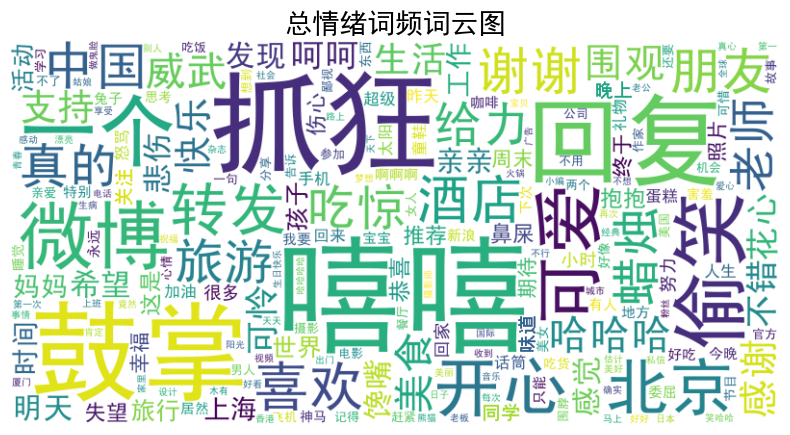

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定中文字体
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
# 读取CSV文件
df_word = pd.read_csv('C:/Users/liyutong/Desktop/语义分析/语义判断/词频.csv', encoding='gbk')
# 将数据转换为字典格式
word_freq = dict(zip(df_word['word'], df_word['freq']))
# 创建词云对象
wordcloud = WordCloud(font_path='C:/Users/liyutong/Desktop/语义分析/语义判断/SimHei.ttf',  # 设置字体路径以显示中文
                      width=800,
                      height=400,
                      background_color='white').generate_from_frequencies(word_freq)
# 显示词云图并添加标题
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 关闭坐标轴
plt.title('总情绪词频词云图', fontsize=20)
plt.show()


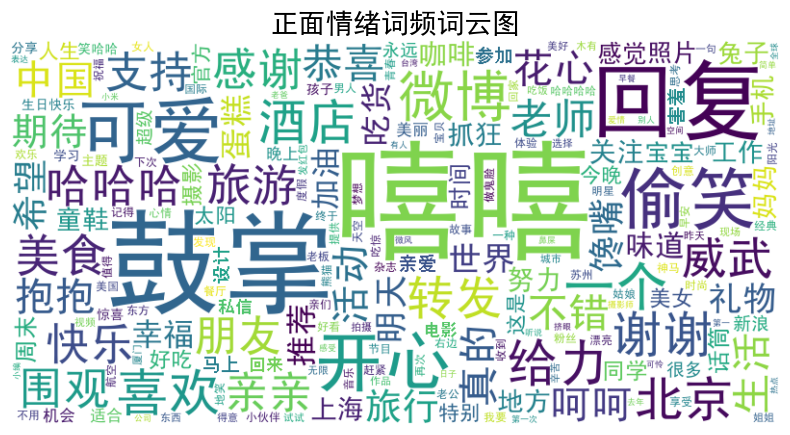

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# 读取CSV文件
df_word = pd.read_csv('C:/Users/liyutong/Desktop/语义分析/语义判断/词频1.csv', encoding='gbk')

# 将数据转换为字典格式
word_freq = dict(zip(df_word['word'], df_word['freq']))

# 创建词云对象
wordcloud = WordCloud(font_path='C:/Users/liyutong/Desktop/语义分析/语义判断/SimHei.ttf',  # 设置字体路径以显示中文
                      width=800,
                      height=400,
                      background_color='white').generate_from_frequencies(word_freq)

# 显示词云图并添加标题
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 关闭坐标轴
plt.title('正面情绪词频词云图', fontsize=20)
plt.show()


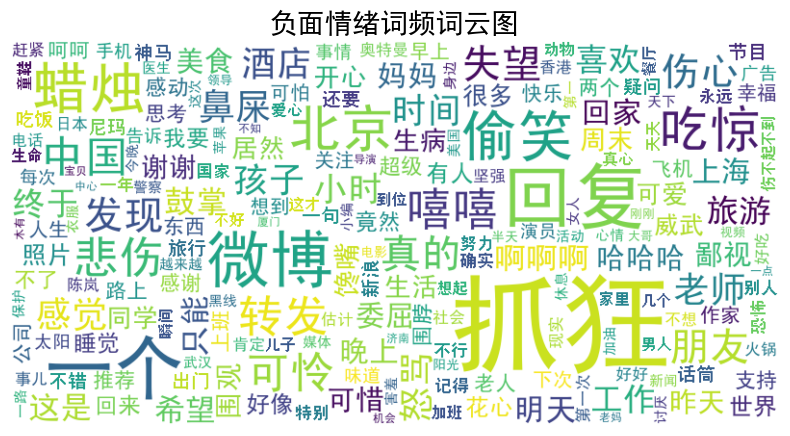

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# 读取CSV文件
df_word = pd.read_csv('C:/Users/liyutong/Desktop/语义分析/语义判断/词频0.csv', encoding='gbk')

# 将数据转换为字典格式
word_freq = dict(zip(df_word['word'], df_word['freq']))

# 创建词云对象
wordcloud = WordCloud(font_path='C:/Users/liyutong/Desktop/语义分析/语义判断/SimHei.ttf',  # 设置字体路径以显示中文
                      width=800,
                      height=400,
                      background_color='white').generate_from_frequencies(word_freq)

# 显示词云图并添加标题
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 关闭坐标轴
plt.title('负面情绪词频词云图', fontsize=20)
plt.show()


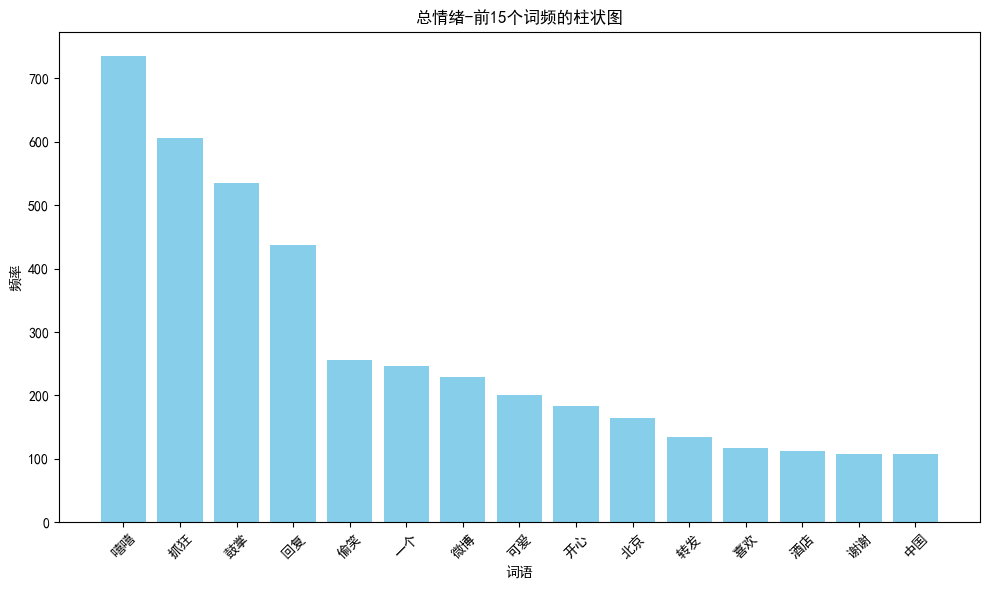

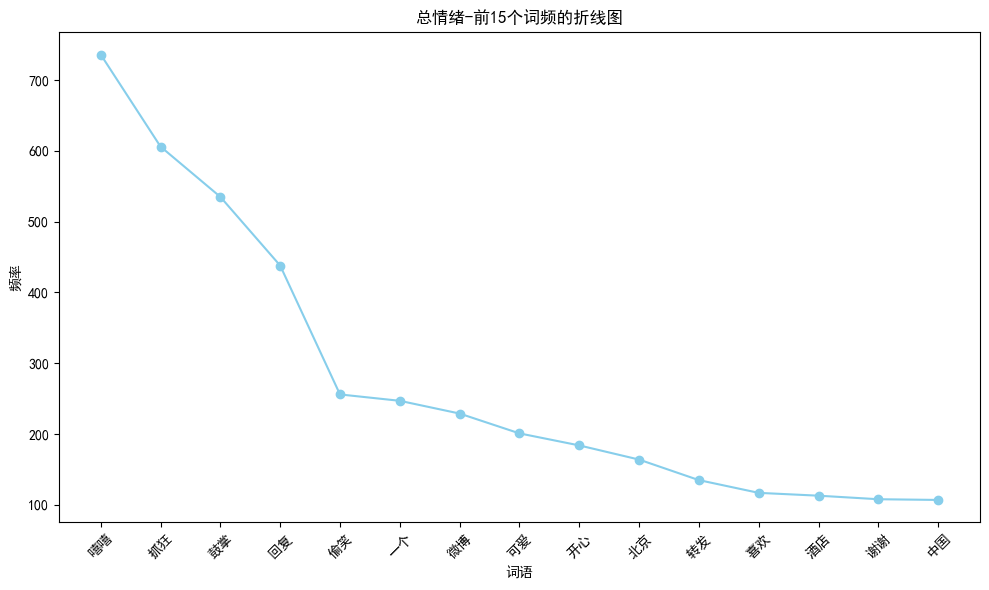

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df_word = pd.read_csv('C:/Users/liyutong/Desktop/语义分析/语义判断/词频.csv', encoding='gbk')

# 按词频降序排序并提取前15个词
df_top15 = df_word.nlargest(15, 'freq')

# 提取词和词频
words = df_top15['word']
frequencies = df_top15['freq']

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('词语')
plt.ylabel('频率')
plt.title('总情绪-前15个词频的柱状图')
plt.xticks(rotation=45)
plt.tight_layout()  # 调整布局防止标签重叠
plt.show()

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(words, frequencies, marker='o', linestyle='-', color='skyblue')
plt.xlabel('词语')
plt.ylabel('频率')
plt.title('总情绪-前15个词频的折线图')
plt.xticks(rotation=45)
plt.tight_layout()  # 调整布局防止标签重叠
plt.show()


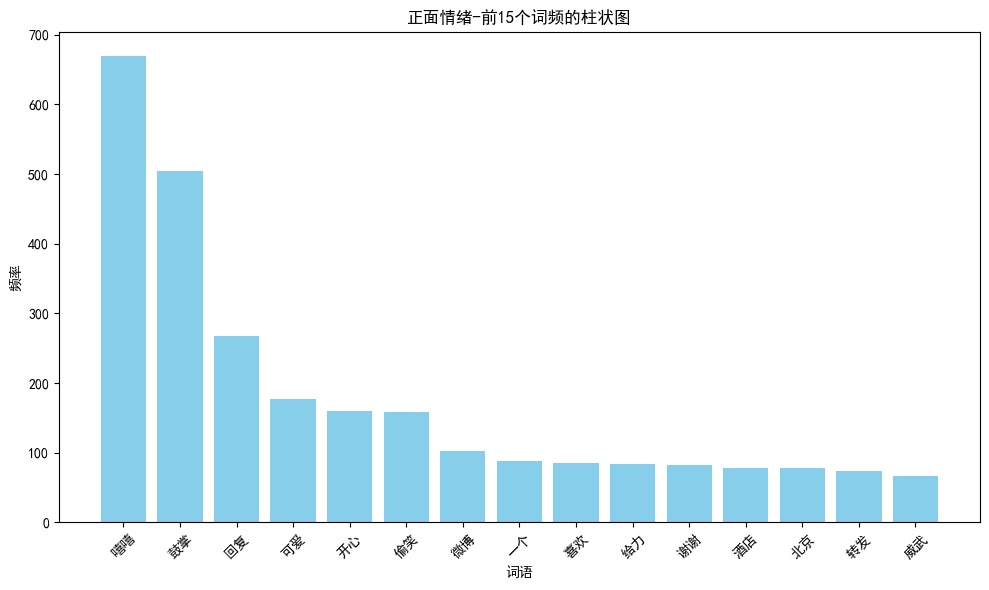

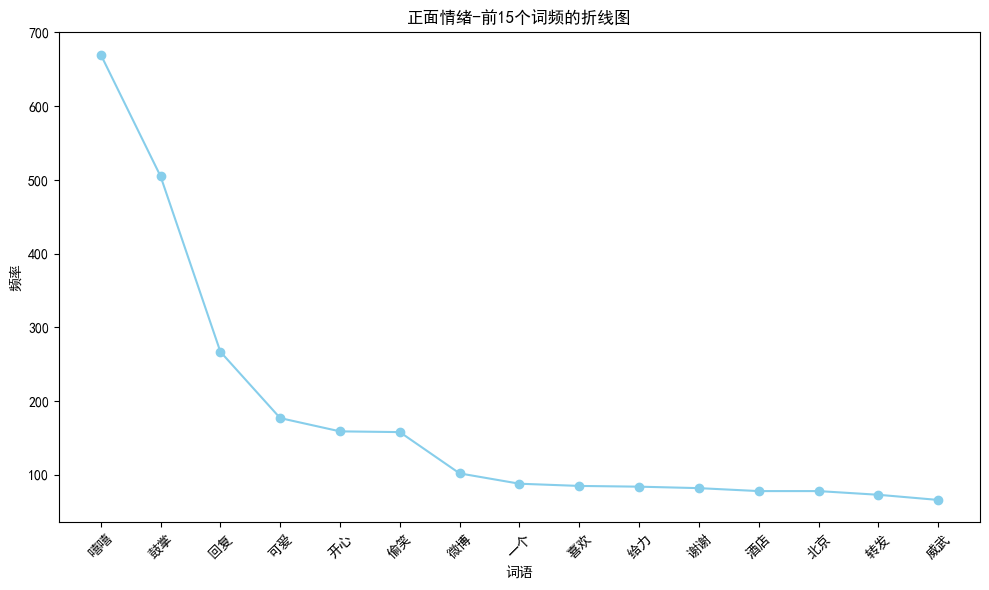

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df_word = pd.read_csv('词频1.csv', encoding='gbk')

# 按词频降序排序并提取前15个词
df_top15 = df_word.nlargest(15, 'freq')

# 提取词和词频
words = df_top15['word']
frequencies = df_top15['freq']

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('词语')
plt.ylabel('频率')
plt.title('正面情绪-前15个词频的柱状图')
plt.xticks(rotation=45)
plt.tight_layout()  # 调整布局防止标签重叠
plt.show()

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(words, frequencies, marker='o', linestyle='-', color='skyblue')
plt.xlabel('词语')
plt.ylabel('频率')
plt.title('正面情绪-前15个词频的折线图')
plt.xticks(rotation=45)
plt.tight_layout()  # 调整布局防止标签重叠
plt.show()


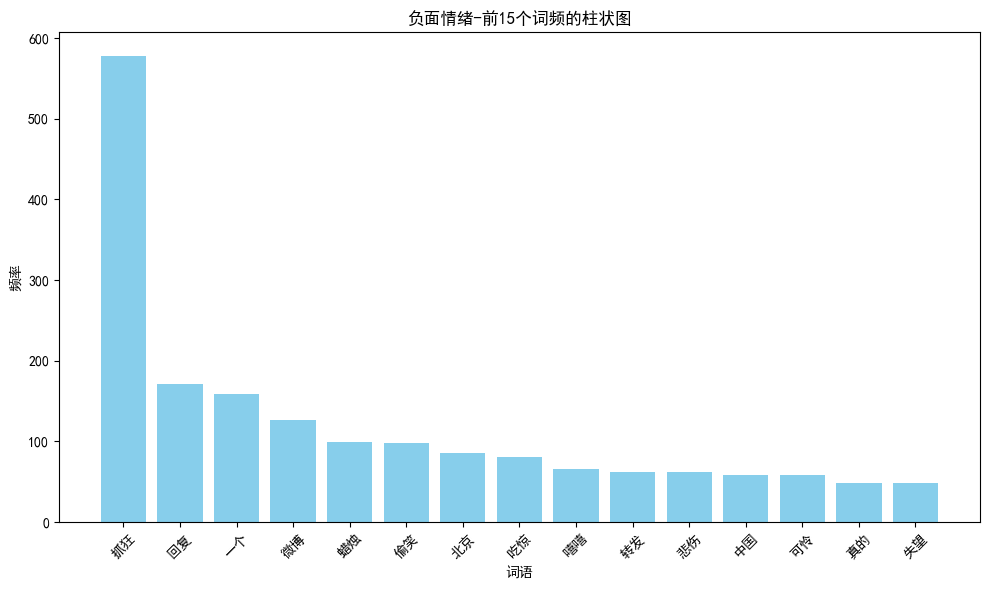

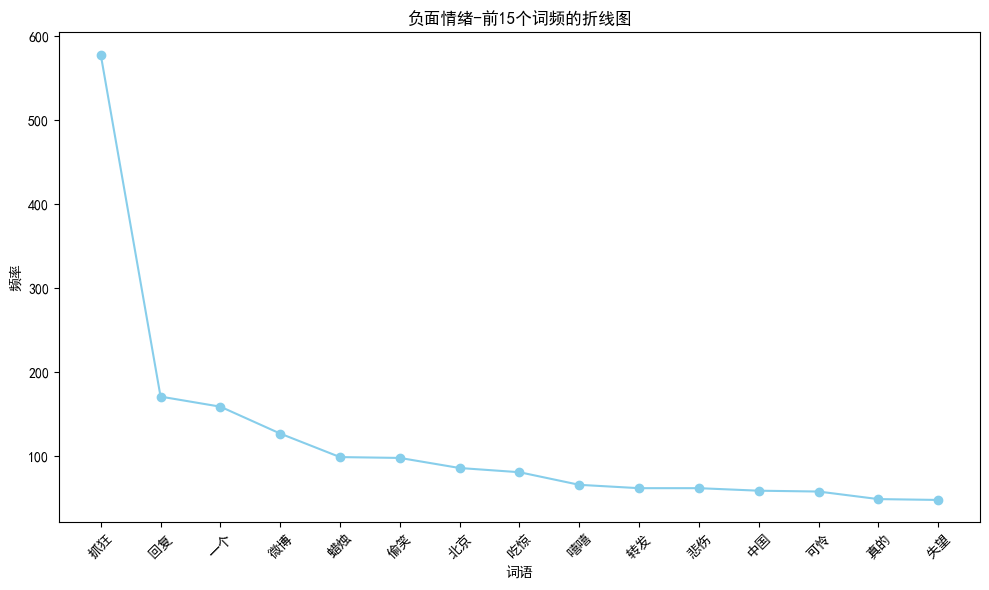

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df_word = pd.read_csv('词频0.csv', encoding='gbk')

# 按词频降序排序并提取前15个词
df_top15 = df_word.nlargest(15, 'freq')

# 提取词和词频
words = df_top15['word']
frequencies = df_top15['freq']

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('词语')
plt.ylabel('频率')
plt.title('负面情绪-前15个词频的柱状图')
plt.xticks(rotation=45)
plt.tight_layout()  # 调整布局防止标签重叠
plt.show()

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(words, frequencies, marker='o', linestyle='-', color='skyblue')
plt.xlabel('词语')
plt.ylabel('频率')
plt.title('负面情绪-前15个词频的折线图')
plt.xticks(rotation=45)
plt.tight_layout()  # 调整布局防止标签重叠
plt.show()
